# 🟣 Women in AI USA — LinkedIn Analytics Dashboard

**Period:** Jan 28, 2025 – Jan 27, 2026 (Content) | Feb 8, 2025 – Feb 7, 2026 (Followers)  
**Data Source:** LinkedIn Page Analytics Exports  
**Content Type:** 100% Organic

---

## 1. Setup & Data Loading

In [3]:
import pandas as pd
import os
os.chdir(os.path.join(os.path.dirname(os.path.abspath('__file__')), '..'))
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

# Style
COLORS = {
    'primary': '#8b5cf6', 'secondary': '#6366f1', 'green': '#22c55e',
    'orange': '#f97316', 'pink': '#ec4899', 'cyan': '#06b6d4',
    'bg': '#0f1117', 'surface': '#1a1d29', 'text': '#e0e0e0', 'grid': '#2a2d3a',
}

plt.rcParams.update({
    'figure.facecolor': COLORS['bg'], 'axes.facecolor': COLORS['surface'],
    'axes.edgecolor': COLORS['grid'], 'axes.labelcolor': COLORS['text'],
    'text.color': COLORS['text'], 'xtick.color': COLORS['text'],
    'ytick.color': COLORS['text'], 'grid.color': COLORS['grid'],
    'grid.alpha': 0.3, 'font.family': 'sans-serif', 'font.size': 10,
    'figure.dpi': 120,
})

%matplotlib inline
print('✓ Libraries loaded')

✓ Libraries loaded


In [4]:
# Load content data
df = pd.read_csv('data/women_in_ai_usa_clean.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)
if 'Total Engagement' not in df.columns:
    df['Total Engagement'] = df['Clicks (total)'] + df['Reactions (total)'] + df['Comments (total)'] + df['Reposts (total)']

# Load follower data
df_f = pd.read_csv('data/women_in_ai_usa_followers.csv')
df_f['Date'] = pd.to_datetime(df_f['Date'])
df_f = df_f.sort_values('Date').reset_index(drop=True)
if 'Cumulative Followers' not in df_f.columns:
    df_f['Cumulative Followers'] = df_f['Total followers'].cumsum()

print(f'✓ Content data: {len(df)} days ({df["Date"].min().date()} to {df["Date"].max().date()})')
print(f'✓ Follower data: {len(df_f)} days ({df_f["Date"].min().date()} to {df_f["Date"].max().date()})')

✓ Content data: 365 days (2025-01-28 to 2026-01-27)
✓ Follower data: 365 days (2025-02-08 to 2026-02-07)


---
## 2. Executive KPI Summary

In [5]:
total_imp = df['Impressions (total)'].sum()
unique_imp = df['Unique impressions (organic)'].sum()
total_eng = df['Total Engagement'].sum()
avg_rate = df['Engagement rate (total)'].mean() * 100
active_days = (df['Total Engagement'] > 0).sum()
total_followers = df_f['Total followers'].sum()
avg_daily_fol = df_f['Total followers'].mean()

html = f"""
<div style="display:flex; flex-wrap:wrap; gap:12px; margin:10px 0;">
  <div style="background:#1a1d29; border-left:4px solid #8b5cf6; padding:12px 18px; border-radius:8px; min-width:160px;">
    <div style="color:#999; font-size:12px;">Total Impressions</div>
    <div style="color:#8b5cf6; font-size:24px; font-weight:bold;">{total_imp:,}</div>
  </div>
  <div style="background:#1a1d29; border-left:4px solid #ec4899; padding:12px 18px; border-radius:8px; min-width:160px;">
    <div style="color:#999; font-size:12px;">Unique Reach</div>
    <div style="color:#ec4899; font-size:24px; font-weight:bold;">{unique_imp:,}</div>
  </div>
  <div style="background:#1a1d29; border-left:4px solid #22c55e; padding:12px 18px; border-radius:8px; min-width:160px;">
    <div style="color:#999; font-size:12px;">Avg Engagement Rate</div>
    <div style="color:#22c55e; font-size:24px; font-weight:bold;">{avg_rate:.2f}%</div>
  </div>
  <div style="background:#1a1d29; border-left:4px solid #6366f1; padding:12px 18px; border-radius:8px; min-width:160px;">
    <div style="color:#999; font-size:12px;">Total Engagements</div>
    <div style="color:#6366f1; font-size:24px; font-weight:bold;">{total_eng:,}</div>
  </div>
  <div style="background:#1a1d29; border-left:4px solid #06b6d4; padding:12px 18px; border-radius:8px; min-width:160px;">
    <div style="color:#999; font-size:12px;">New Followers</div>
    <div style="color:#06b6d4; font-size:24px; font-weight:bold;">{total_followers:,}</div>
  </div>
  <div style="background:#1a1d29; border-left:4px solid #f97316; padding:12px 18px; border-radius:8px; min-width:160px;">
    <div style="color:#999; font-size:12px;">Active Days</div>
    <div style="color:#f97316; font-size:24px; font-weight:bold;">{active_days}/365</div>
  </div>
</div>
"""
display(HTML(html))

---
## 3. Follower Growth

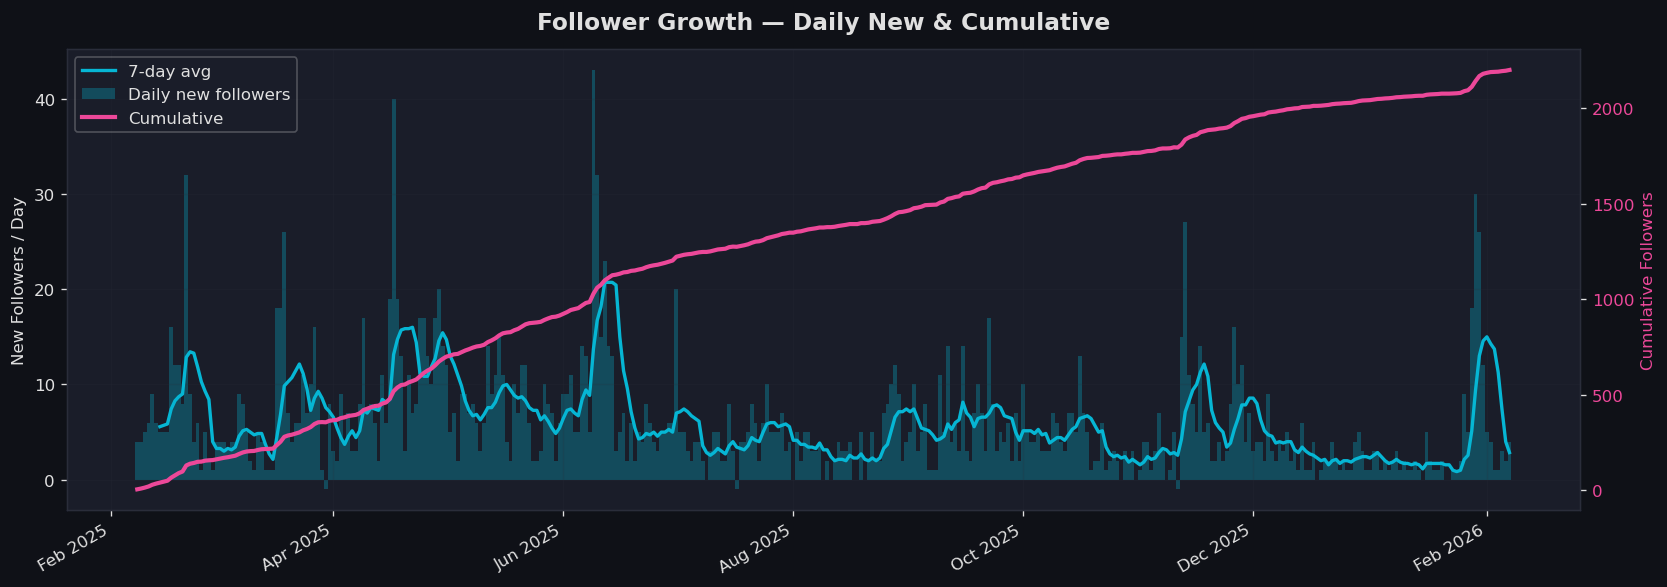

In [6]:
fig, ax1 = plt.subplots(figsize=(14, 5))

ax1.bar(df_f['Date'], df_f['Total followers'], alpha=0.3, color=COLORS['cyan'], width=1.0, label='Daily new followers')
rolling_f = df_f['Total followers'].rolling(7).mean()
ax1.plot(df_f['Date'], rolling_f, linewidth=2, color=COLORS['cyan'], label='7-day avg')

ax2 = ax1.twinx()
ax2.plot(df_f['Date'], df_f['Cumulative Followers'], linewidth=2.5, color=COLORS['pink'], label='Cumulative')
ax2.set_ylabel('Cumulative Followers', color=COLORS['pink'])
ax2.tick_params(axis='y', labelcolor=COLORS['pink'])

ax1.set_title('Follower Growth — Daily New & Cumulative', fontsize=14, fontweight='bold', pad=12)
ax1.set_ylabel('New Followers / Day')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', framealpha=0.3)
ax1.grid(True, alpha=0.2)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

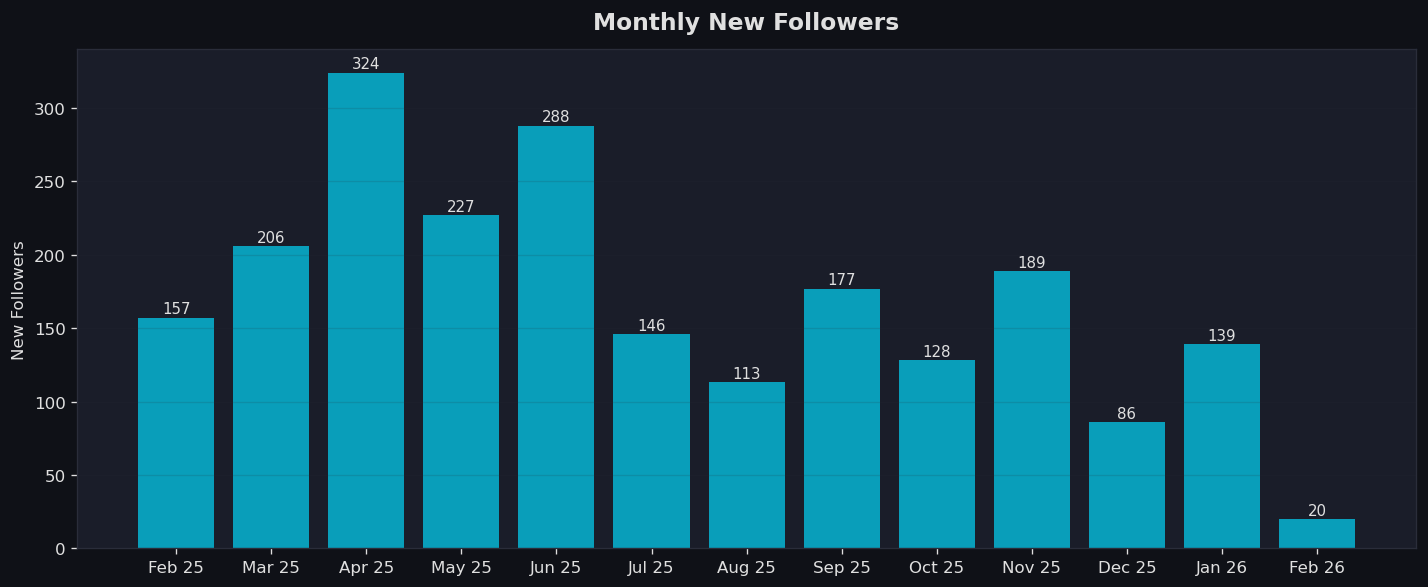

Best month:  Apr 25 (+324)
Worst month: Feb 26 (+20)
Avg/month:   169


In [7]:
# Monthly new followers
df_fm = df_f.set_index('Date').resample('ME')['Total followers'].sum().reset_index()
df_fm['month_label'] = df_fm['Date'].dt.strftime('%b %y')

fig, ax = plt.subplots(figsize=(12, 5))
x = np.arange(len(df_fm))
bars = ax.bar(x, df_fm['Total followers'], color=COLORS['cyan'], alpha=0.85)
for i, v in enumerate(df_fm['Total followers']):
    ax.text(i, v + 3, str(v), ha='center', fontsize=9, color=COLORS['text'])
ax.set_xticks(x)
ax.set_xticklabels(df_fm['month_label'])
ax.set_title('Monthly New Followers', fontsize=14, fontweight='bold', pad=12)
ax.set_ylabel('New Followers')
ax.grid(True, alpha=0.15, axis='y')
plt.tight_layout()
plt.show()

print(f'Best month:  {df_fm.loc[df_fm["Total followers"].idxmax(), "month_label"]} (+{df_fm["Total followers"].max()})')
print(f'Worst month: {df_fm.loc[df_fm["Total followers"].idxmin(), "month_label"]} (+{df_fm["Total followers"].min()})')
print(f'Avg/month:   {df_fm["Total followers"].mean():.0f}')

---
## 4. Impressions & Reach

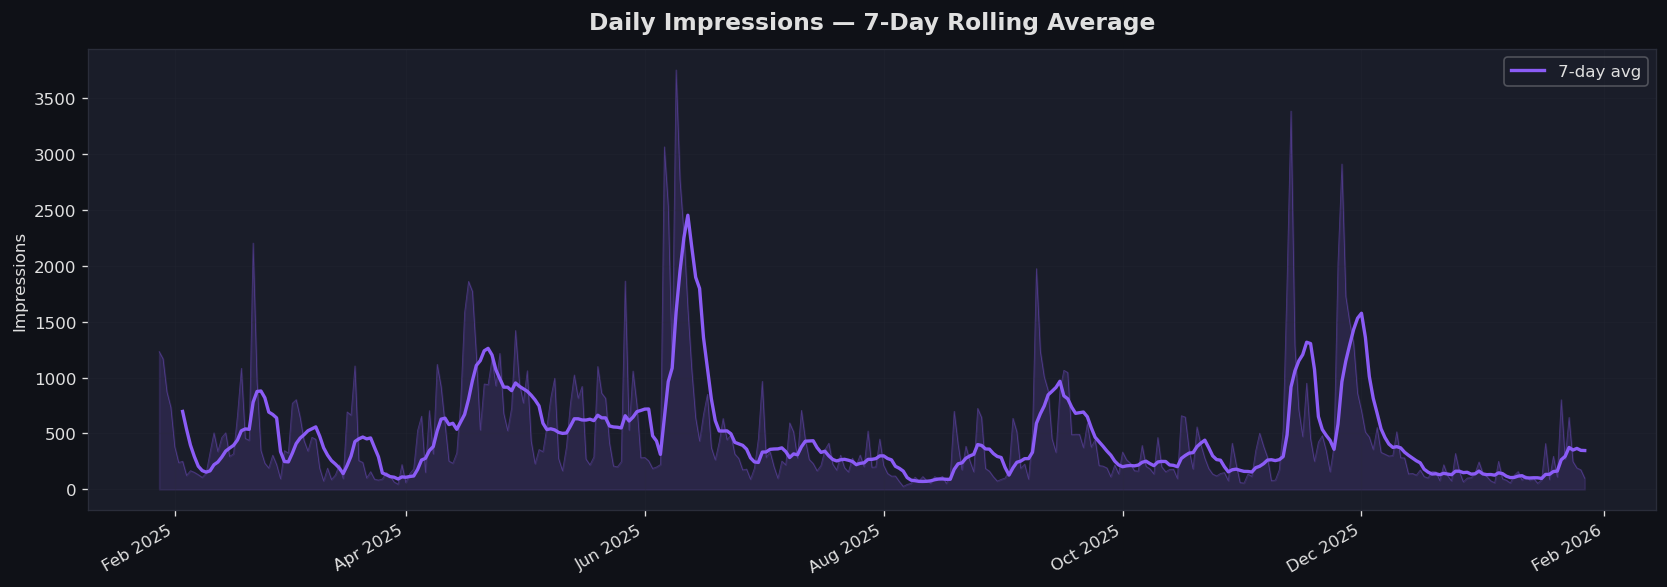

In [8]:
fig, ax = plt.subplots(figsize=(14, 5))
ax.fill_between(df['Date'], df['Impressions (total)'], alpha=0.15, color=COLORS['primary'])
ax.plot(df['Date'], df['Impressions (total)'], alpha=0.3, linewidth=0.5, color=COLORS['primary'])
rolling_imp = df['Impressions (total)'].rolling(7).mean()
ax.plot(df['Date'], rolling_imp, linewidth=2, color=COLORS['primary'], label='7-day avg')
ax.set_title('Daily Impressions — 7-Day Rolling Average', fontsize=14, fontweight='bold', pad=12)
ax.set_ylabel('Impressions')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.legend(framealpha=0.3)
ax.grid(True, alpha=0.2)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

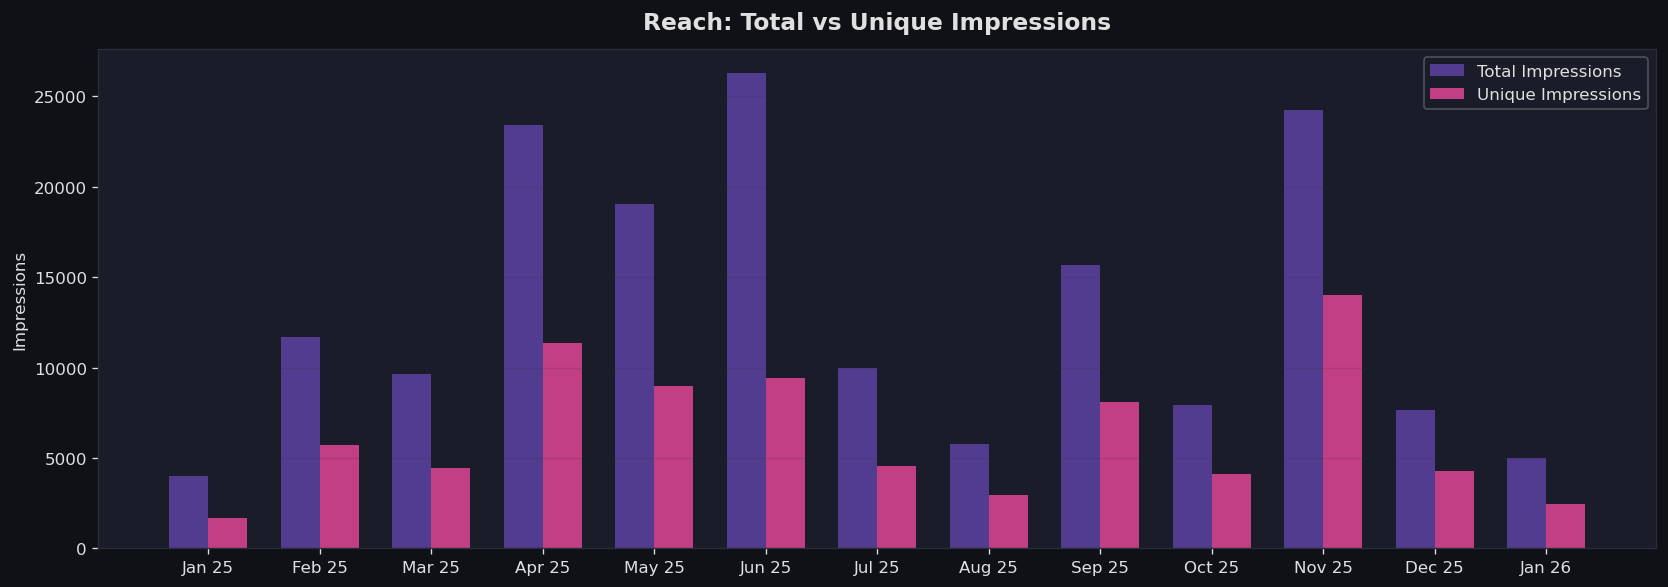

Reach Ratio: 48.2% (unique/total) — healthy mix of new + returning audience


In [9]:
# Reach: Total vs Unique Impressions by month
df_rm = df.set_index('Date').resample('ME').agg({
    'Impressions (total)': 'sum', 'Unique impressions (organic)': 'sum'
}).reset_index()
df_rm['month_label'] = df_rm['Date'].dt.strftime('%b %y')

fig, ax = plt.subplots(figsize=(14, 5))
x = np.arange(len(df_rm))
w = 0.35
ax.bar(x - w/2, df_rm['Impressions (total)'], w, color=COLORS['primary'], alpha=0.5, label='Total Impressions')
ax.bar(x + w/2, df_rm['Unique impressions (organic)'], w, color=COLORS['pink'], alpha=0.8, label='Unique Impressions')
ax.set_xticks(x)
ax.set_xticklabels(df_rm['month_label'])
ax.set_title('Reach: Total vs Unique Impressions', fontsize=14, fontweight='bold', pad=12)
ax.set_ylabel('Impressions')
ax.legend(framealpha=0.3)
ax.grid(True, alpha=0.15, axis='y')
plt.tight_layout()
plt.show()

print(f'Reach Ratio: {unique_imp/total_imp:.1%} (unique/total) — healthy mix of new + returning audience')

---
## 5. Engagement Analysis

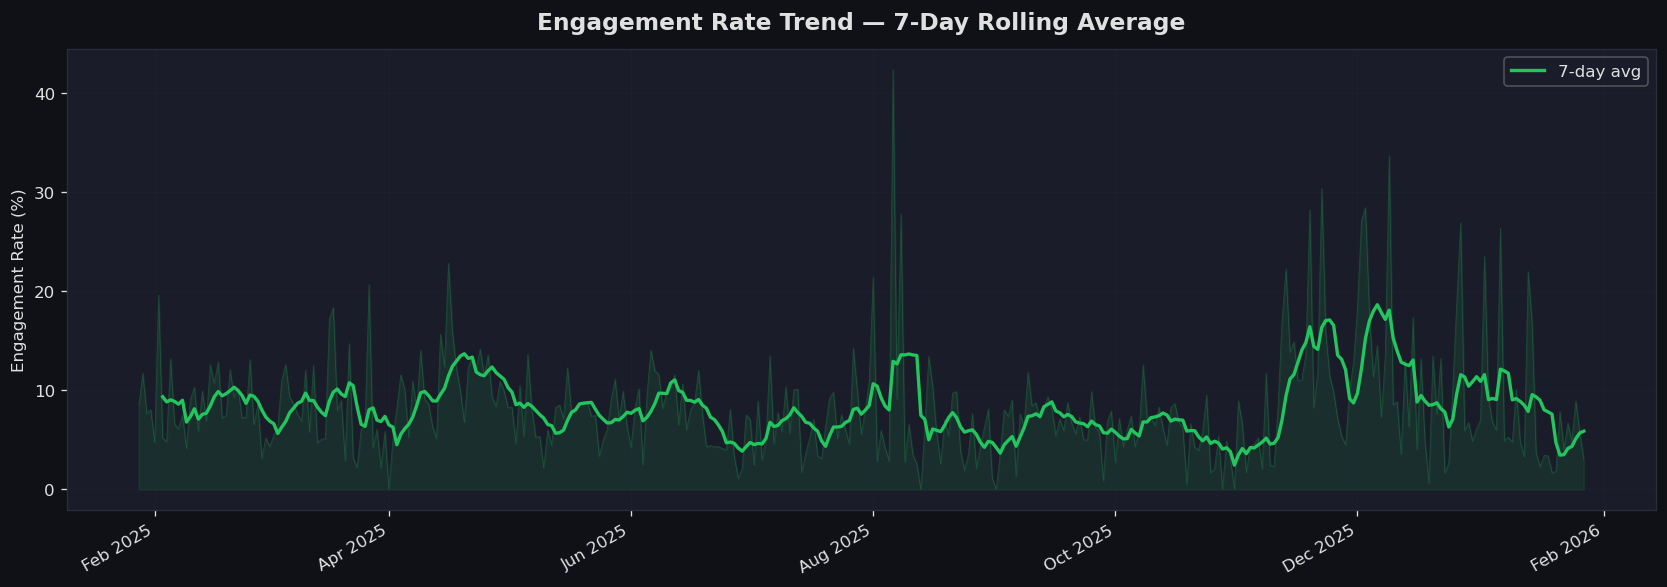

In [10]:
fig, ax = plt.subplots(figsize=(14, 5))
rate = df['Engagement rate (total)'] * 100
rolling_rate = rate.rolling(7).mean()
ax.fill_between(df['Date'], rate, alpha=0.1, color=COLORS['green'])
ax.plot(df['Date'], rate, alpha=0.2, linewidth=0.5, color=COLORS['green'])
ax.plot(df['Date'], rolling_rate, linewidth=2, color=COLORS['green'], label='7-day avg')
ax.set_title('Engagement Rate Trend — 7-Day Rolling Average', fontsize=14, fontweight='bold', pad=12)
ax.set_ylabel('Engagement Rate (%)')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.legend(framealpha=0.3)
ax.grid(True, alpha=0.2)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

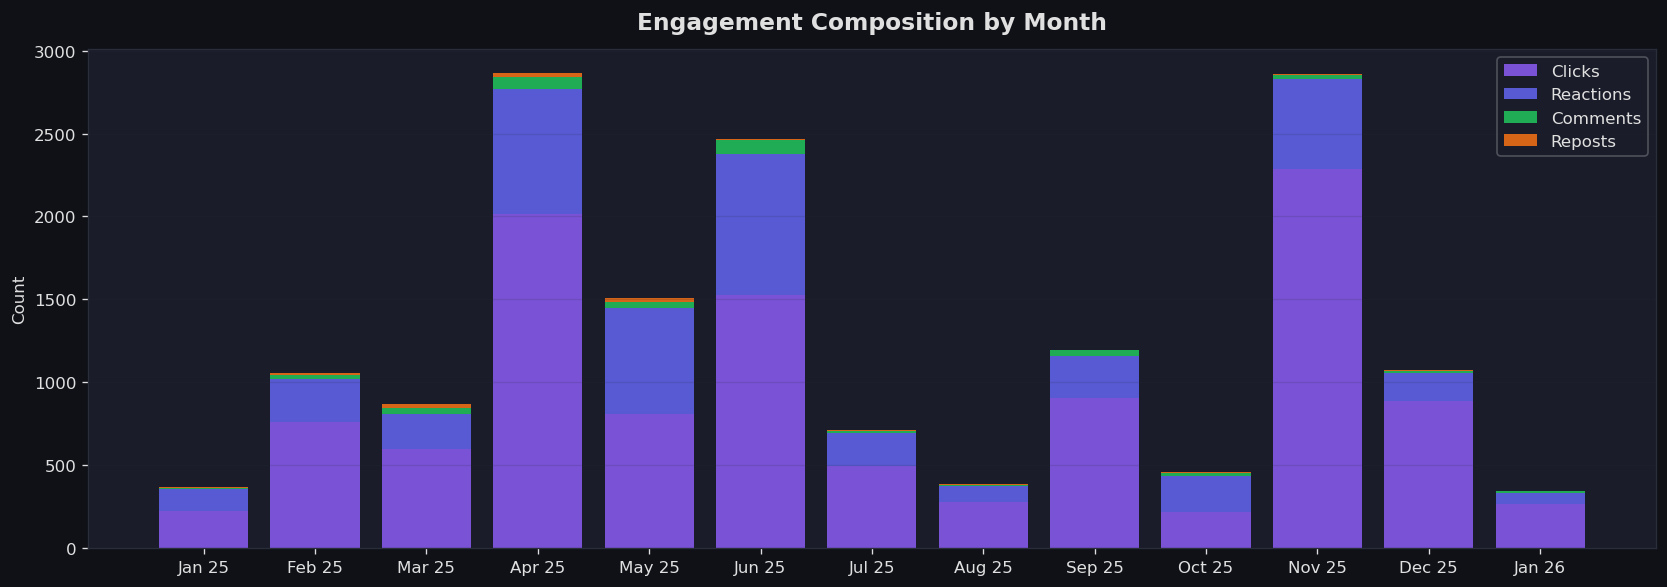

Clicks: 11,284 (69.8%) | Reactions: 4,371 (27.0%) | Comments: 393 (2.4%) | Reposts: 123 (0.8%)


In [11]:
# Engagement composition by month
df_em = df.set_index('Date').resample('ME').agg({
    'Clicks (total)': 'sum', 'Reactions (total)': 'sum',
    'Comments (total)': 'sum', 'Reposts (total)': 'sum',
}).reset_index()
df_em['month_label'] = df_em['Date'].dt.strftime('%b %y')

fig, ax = plt.subplots(figsize=(14, 5))
x = np.arange(len(df_em))
bottom = np.zeros(len(df_em))
for col, color, label in [
    ('Clicks (total)', COLORS['primary'], 'Clicks'),
    ('Reactions (total)', COLORS['secondary'], 'Reactions'),
    ('Comments (total)', COLORS['green'], 'Comments'),
    ('Reposts (total)', COLORS['orange'], 'Reposts'),
]:
    vals = df_em[col].values
    ax.bar(x, vals, bottom=bottom, color=color, alpha=0.85, label=label)
    bottom += vals
ax.set_xticks(x)
ax.set_xticklabels(df_em['month_label'])
ax.set_title('Engagement Composition by Month', fontsize=14, fontweight='bold', pad=12)
ax.set_ylabel('Count')
ax.legend(framealpha=0.3)
ax.grid(True, alpha=0.15, axis='y')
plt.tight_layout()
plt.show()

clicks = df['Clicks (total)'].sum()
reactions = df['Reactions (total)'].sum()
comments = df['Comments (total)'].sum()
reposts = df['Reposts (total)'].sum()
print(f'Clicks: {clicks:,} ({clicks/total_eng*100:.1f}%) | Reactions: {reactions:,} ({reactions/total_eng*100:.1f}%) | Comments: {comments:,} ({comments/total_eng*100:.1f}%) | Reposts: {reposts:,} ({reposts/total_eng*100:.1f}%)')

---
## 6. Monthly Performance Breakdown

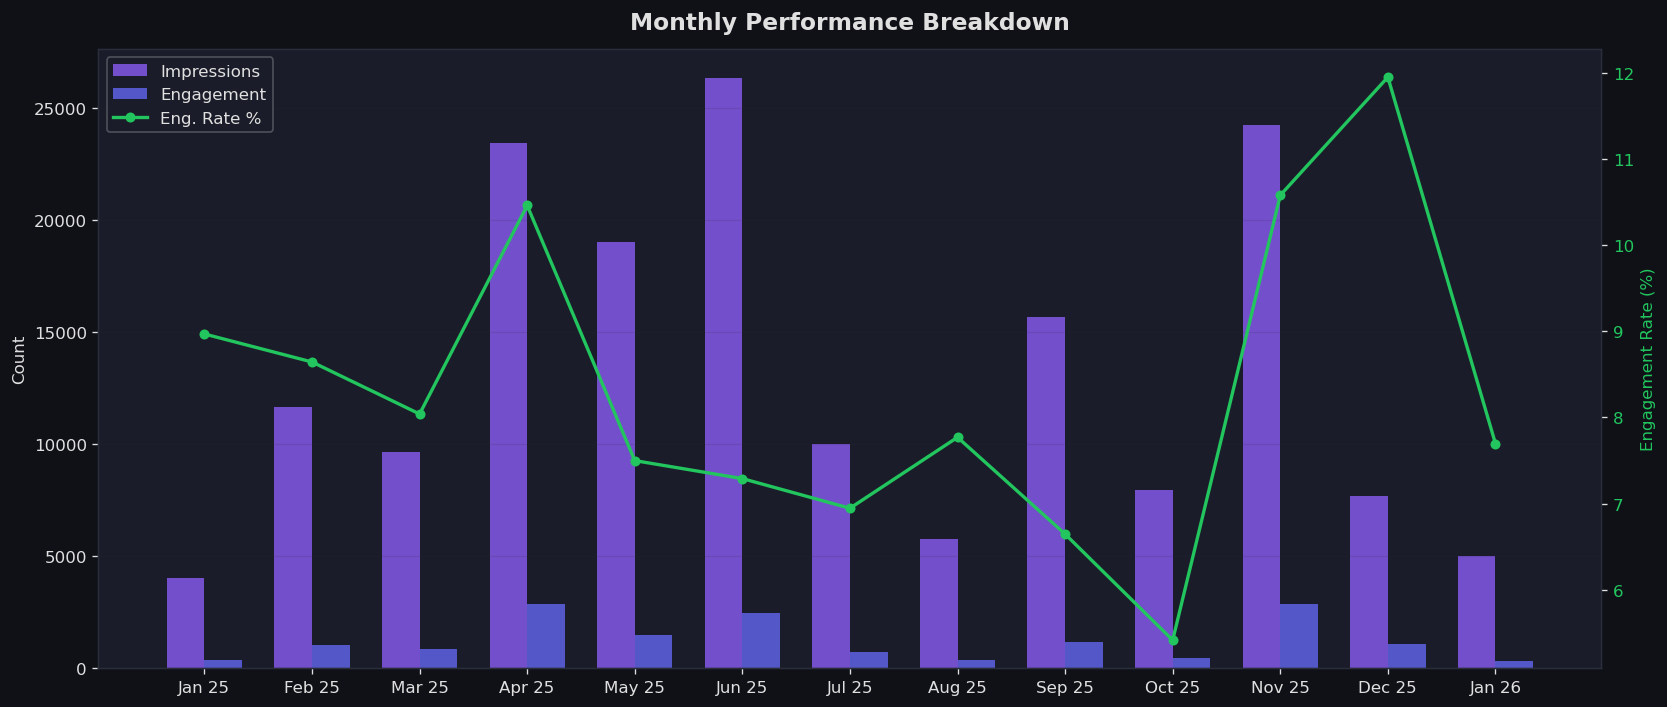

In [12]:
df_mm = df.set_index('Date').resample('ME').agg({
    'Impressions (total)': 'sum', 'Total Engagement': 'sum', 'Engagement rate (total)': 'mean',
}).reset_index()
df_mm['month_label'] = df_mm['Date'].dt.strftime('%b %y')

fig, ax1 = plt.subplots(figsize=(14, 6))
x = np.arange(len(df_mm))
w = 0.35
ax1.bar(x - w/2, df_mm['Impressions (total)'], w, color=COLORS['primary'], alpha=0.8, label='Impressions')
ax1.bar(x + w/2, df_mm['Total Engagement'], w, color=COLORS['secondary'], alpha=0.8, label='Engagement')
ax2 = ax1.twinx()
ax2.plot(x, df_mm['Engagement rate (total)'] * 100, color=COLORS['green'], linewidth=2, marker='o', markersize=5, label='Eng. Rate %')
ax2.set_ylabel('Engagement Rate (%)', color=COLORS['green'])
ax2.tick_params(axis='y', labelcolor=COLORS['green'])
ax1.set_xticks(x)
ax1.set_xticklabels(df_mm['month_label'])
ax1.set_ylabel('Count')
ax1.set_title('Monthly Performance Breakdown', fontsize=14, fontweight='bold', pad=12)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', framealpha=0.3)
ax1.grid(True, alpha=0.15, axis='y')
plt.tight_layout()
plt.show()

---
## 7. Day-of-Week Performance

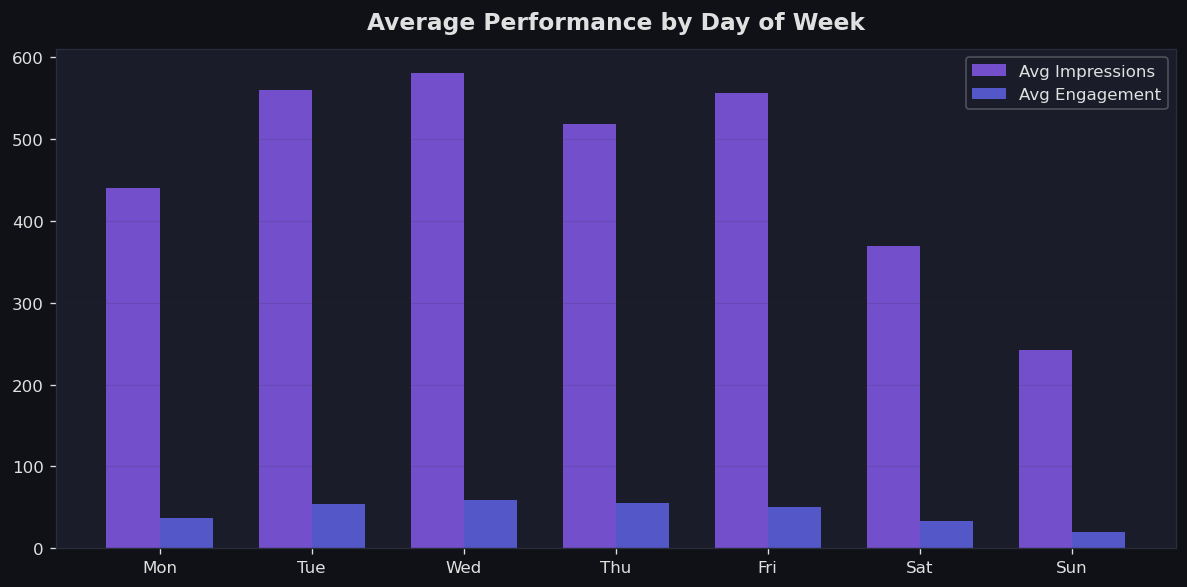

Best day: Wednesday (581 avg impressions)
Worst day: Sunday (242 avg impressions)
Midweek is 2.4x better than Sunday


In [13]:
df_dow = df.copy()
df_dow['DayOfWeek'] = df_dow['Date'].dt.day_name()
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow = df_dow.groupby('DayOfWeek').agg({
    'Impressions (total)': 'mean', 'Total Engagement': 'mean', 'Engagement rate (total)': 'mean'
}).reindex(dow_order)

fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(dow_order))
w = 0.35
ax.bar(x - w/2, dow['Impressions (total)'], w, color=COLORS['primary'], alpha=0.8, label='Avg Impressions')
ax.bar(x + w/2, dow['Total Engagement'], w, color=COLORS['secondary'], alpha=0.8, label='Avg Engagement')
ax.set_xticks(x)
ax.set_xticklabels([d[:3] for d in dow_order])
ax.set_title('Average Performance by Day of Week', fontsize=14, fontweight='bold', pad=12)
ax.legend(framealpha=0.3)
ax.grid(True, alpha=0.15, axis='y')
plt.tight_layout()
plt.show()

best_day = dow['Impressions (total)'].idxmax()
worst_day = dow['Impressions (total)'].idxmin()
print(f'Best day: {best_day} ({dow.loc[best_day, "Impressions (total)"]:.0f} avg impressions)')
print(f'Worst day: {worst_day} ({dow.loc[worst_day, "Impressions (total)"]:.0f} avg impressions)')
print(f'Midweek is {dow.loc["Wednesday", "Impressions (total)"] / dow.loc["Sunday", "Impressions (total)"]:.1f}x better than Sunday')

---
## 8. Top 10 Performing Days

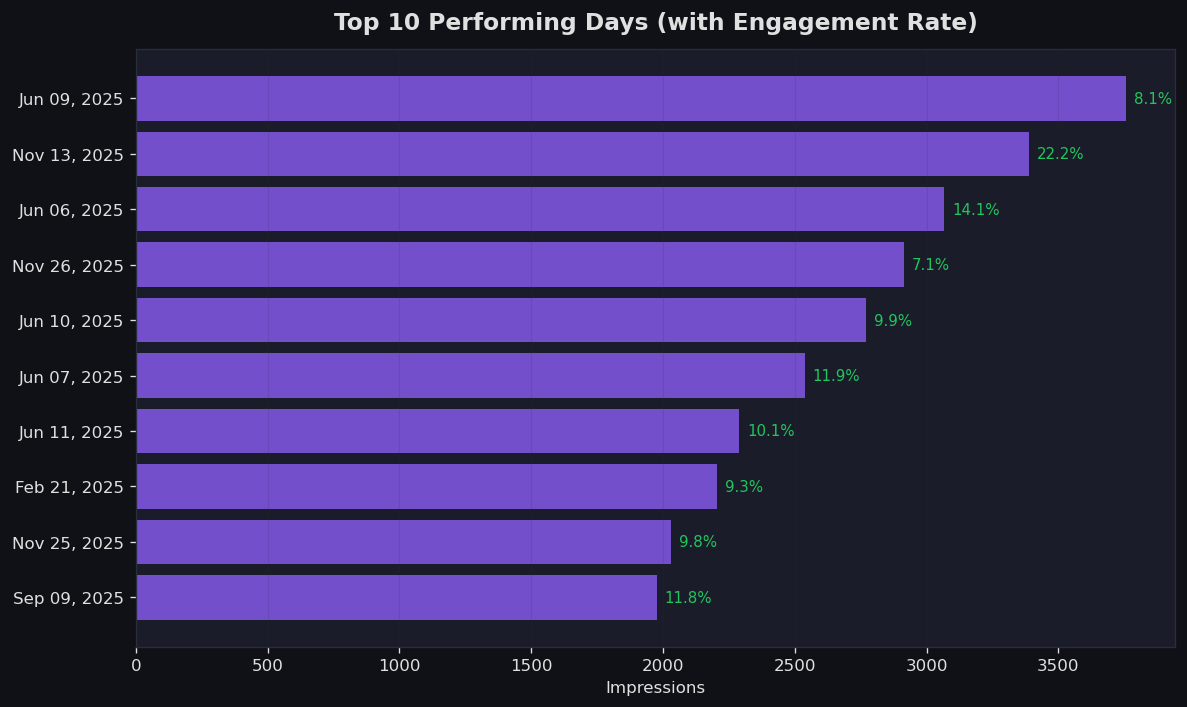

In [14]:
top = df.nlargest(10, 'Impressions (total)').sort_values('Impressions (total)')

fig, ax = plt.subplots(figsize=(10, 6))
labels = top['Date'].dt.strftime('%b %d, %Y')
y = np.arange(len(top))
ax.barh(y, top['Impressions (total)'], color=COLORS['primary'], alpha=0.8)
for i, (imp, eng) in enumerate(zip(top['Impressions (total)'], top['Engagement rate (total)'])):
    ax.text(imp + 30, i, f'{eng*100:.1f}%', va='center', fontsize=9, color=COLORS['green'])
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.set_xlabel('Impressions')
ax.set_title('Top 10 Performing Days (with Engagement Rate)', fontsize=14, fontweight='bold', pad=12)
ax.grid(True, alpha=0.15, axis='x')
plt.tight_layout()
plt.show()

---
## 9. Followers vs Content Performance

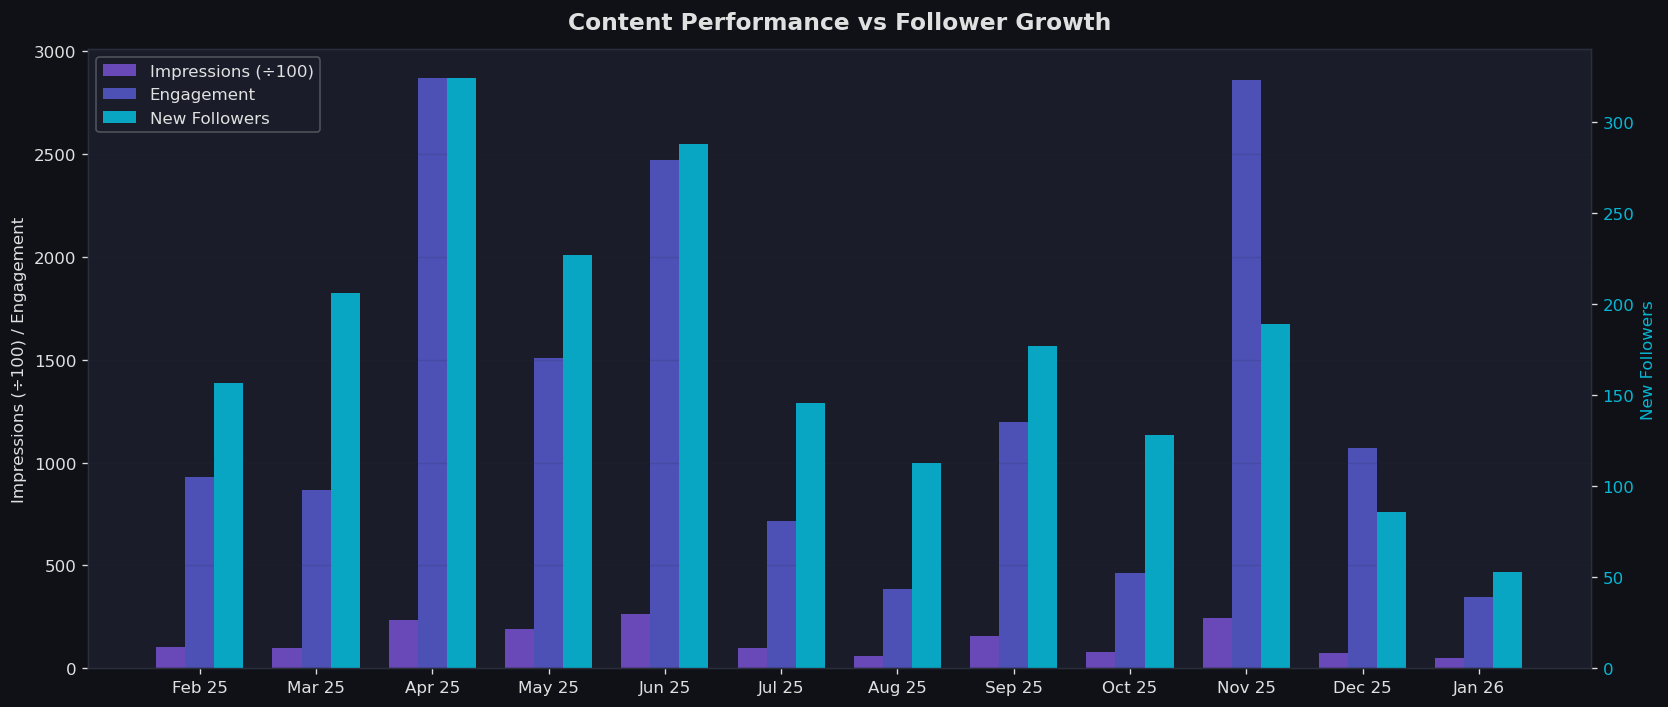

Monthly correlation (impressions ↔ followers): 0.855
Follower efficiency: 12.7 new followers per 1,000 impressions


In [15]:
# Merge on overlapping dates
merged = pd.merge(
    df[['Date', 'Impressions (total)', 'Total Engagement']],
    df_f[['Date', 'Total followers', 'Cumulative Followers']],
    on='Date', how='inner'
)

monthly_m = merged.set_index('Date').resample('ME').agg({
    'Impressions (total)': 'sum', 'Total Engagement': 'sum', 'Total followers': 'sum',
}).reset_index()
monthly_m['month_label'] = monthly_m['Date'].dt.strftime('%b %y')

fig, ax1 = plt.subplots(figsize=(14, 6))
x = np.arange(len(monthly_m))
w = 0.25
ax1.bar(x - w, monthly_m['Impressions (total)'] / 100, w, color=COLORS['primary'], alpha=0.7, label='Impressions (÷100)')
ax1.bar(x, monthly_m['Total Engagement'], w, color=COLORS['secondary'], alpha=0.7, label='Engagement')
ax2 = ax1.twinx()
ax2.bar(x + w, monthly_m['Total followers'], w, color=COLORS['cyan'], alpha=0.9, label='New Followers')
ax2.set_ylabel('New Followers', color=COLORS['cyan'])
ax2.tick_params(axis='y', labelcolor=COLORS['cyan'])
ax1.set_xticks(x)
ax1.set_xticklabels(monthly_m['month_label'])
ax1.set_ylabel('Impressions (÷100) / Engagement')
ax1.set_title('Content Performance vs Follower Growth', fontsize=14, fontweight='bold', pad=12)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', framealpha=0.3)
ax1.grid(True, alpha=0.15, axis='y')
plt.tight_layout()
plt.show()

corr = monthly_m['Impressions (total)'].corr(monthly_m['Total followers'])
efficiency = merged['Total followers'].sum() / (merged['Impressions (total)'].sum() / 1000)
print(f'Monthly correlation (impressions ↔ followers): {corr:.3f}')
print(f'Follower efficiency: {efficiency:.1f} new followers per 1,000 impressions')

---
## 10. Follower Growth by Day of Week

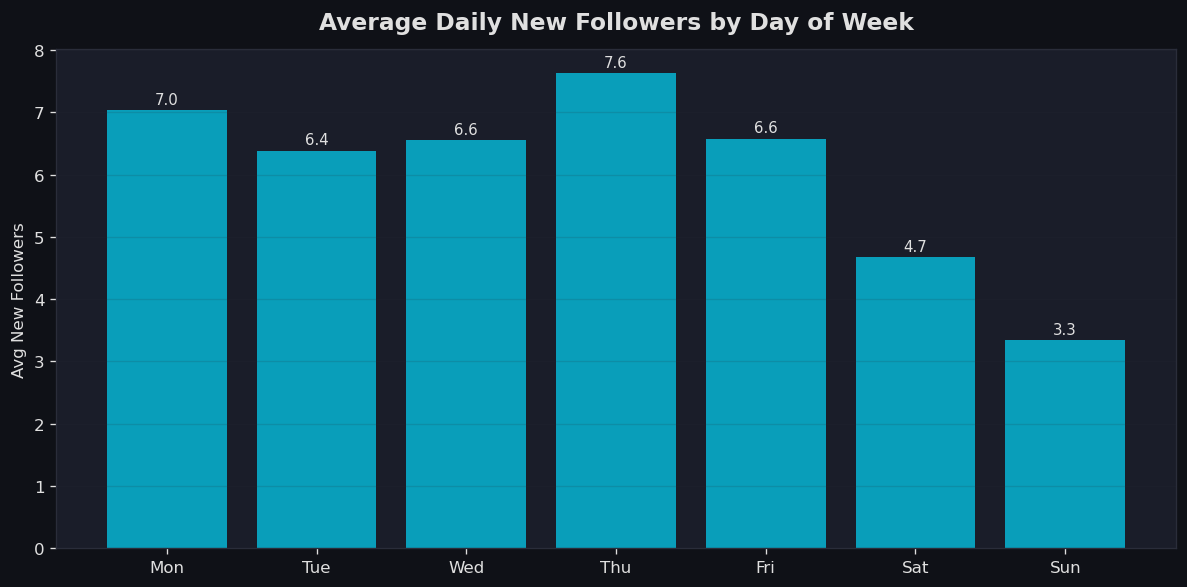

In [16]:
df_f_dow = df_f.copy()
df_f_dow['DayOfWeek'] = df_f_dow['Date'].dt.day_name()
dow_f = df_f_dow.groupby('DayOfWeek')['Total followers'].mean().reindex(dow_order)

fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(dow_order))
ax.bar(x, dow_f.values, color=COLORS['cyan'], alpha=0.85)
for i, v in enumerate(dow_f.values):
    ax.text(i, v + 0.1, f'{v:.1f}', ha='center', fontsize=9, color=COLORS['text'])
ax.set_xticks(x)
ax.set_xticklabels([d[:3] for d in dow_order])
ax.set_title('Average Daily New Followers by Day of Week', fontsize=14, fontweight='bold', pad=12)
ax.set_ylabel('Avg New Followers')
ax.grid(True, alpha=0.15, axis='y')
plt.tight_layout()
plt.show()

---
## 11. Key Insights & Recommendations

### ✅ Strengths
- **98.6% activity rate** — near-perfect posting consistency (360/365 days)
- **8.25% engagement rate** — 2–4x the nonprofit LinkedIn benchmark of 2–4%
- **2,200 organic followers** gained with zero paid promotion
- **0.855 monthly correlation** between impressions and follower growth — content directly drives audience
- **69.8% click-through** — audience actively seeks more information

### ⚠️ Gaps
- **Reposts only 0.8%** — content isn't designed for viral amplification
- **Comments only 2.4%** — posts aren't prompting community discussion
- **Summer slump** (Jul–Aug) — 48–57% drop in impressions with no recovery plan
- **Weekend waste** — Saturday/Sunday deliver 40–58% less reach than mid-week
- **Follower growth declining** — last 3 months averaged 64% fewer new followers than first 3 months

### 🎯 Recommendations
1. **Focus posting on Tue–Thu** — Wednesday is the best day; eliminate weekend posts
2. **Create shareable content** — carousels, quote cards, data infographics to boost reposts
3. **Add CTAs to every post** — "What's your take?", "Tag someone who…" to drive comments
4. **Plan for seasonal dips** — pre-schedule a "Summer of AI" series for Jul–Aug
5. **Replicate peak content** — analyze June 9 and Nov 13 posts to build a "hit content" playbook
6. **Address follower growth decline** — consider cross-platform expansion (Instagram, YouTube) to tap new audiences

---

## 12. Monthly Summary Table

In [17]:
# Build comprehensive monthly table
content_monthly = df.set_index('Date').resample('ME').agg({
    'Impressions (total)': 'sum',
    'Total Engagement': 'sum',
    'Engagement rate (total)': 'mean',
}).reset_index()
content_monthly['Month'] = content_monthly['Date'].dt.strftime('%Y-%m')

follower_monthly = df_f.set_index('Date').resample('ME')['Total followers'].sum().reset_index()
follower_monthly['Month'] = follower_monthly['Date'].dt.strftime('%Y-%m')

summary = pd.merge(content_monthly[['Month', 'Impressions (total)', 'Total Engagement', 'Engagement rate (total)']],
                    follower_monthly[['Month', 'Total followers']],
                    on='Month', how='outer').sort_values('Month')

summary.columns = ['Month', 'Impressions', 'Engagements', 'Eng. Rate', 'New Followers']
summary['Eng. Rate'] = (summary['Eng. Rate'] * 100).round(2).astype(str) + '%'
summary['Impressions'] = summary['Impressions'].apply(lambda x: f'{x:,.0f}' if pd.notnull(x) else '—')
summary['Engagements'] = summary['Engagements'].apply(lambda x: f'{x:,.0f}' if pd.notnull(x) else '—')
summary['New Followers'] = summary['New Followers'].apply(lambda x: f'{x:,.0f}' if pd.notnull(x) else '—')

display(summary.style.set_properties(**{'text-align': 'right'}).set_properties(subset=['Month'], **{'text-align': 'left', 'font-weight': 'bold'}).hide(axis='index'))

Month,Impressions,Engagements,Eng. Rate,New Followers
2025-01,"4,009",367,8.97%,—
2025-02,"11,667","1,055",8.64%,157
2025-03,"9,660",868,8.04%,206
2025-04,"23,424","2,866",10.46%,324
2025-05,"19,030","1,509",7.5%,227
2025-06,"26,309","2,469",7.29%,288
2025-07,"9,984",715,6.95%,146
2025-08,"5,789",385,7.77%,113
2025-09,"15,652","1,196",6.65%,177
2025-10,"7,952",462,5.42%,128


---
*Report generated by the Women in AI USA Analytics Pipeline — [GitHub Repository](https://github.com/Nityaa2396/ai-engage-project)*